In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('/content/Ice Cream.csv')
print(df.head())

   Temperature  Revenue
0         24.6      535
1         26.1      626
2         27.8      661
3         20.6      488
4         11.6      317


In [3]:
print(df.describe())
print(df.info())

       Temperature      Revenue
count   500.000000   500.000000
mean     22.281600   522.058000
std       8.097597   175.410399
min       0.000000    10.000000
25%      17.175000   406.000000
50%      22.400000   530.000000
75%      27.800000   643.000000
max      45.000000  1000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


In [4]:
print(df.isnull().sum())

Temperature    0
Revenue        0
dtype: int64


In [5]:
df.fillna(method='ffill', inplace=True)


<ipython-input-5-e9443599d05e>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


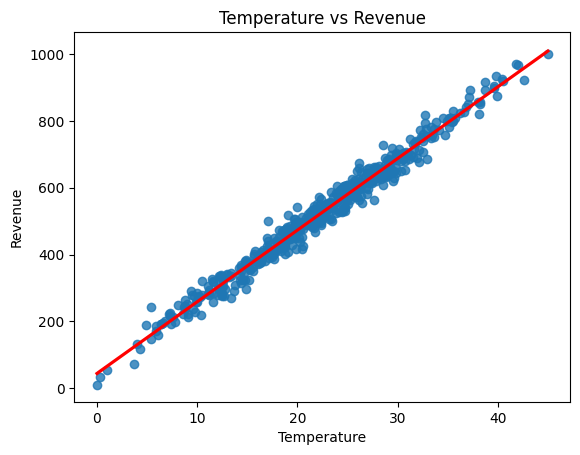

In [10]:
sns.regplot(x='Temperature', y='Revenue', data=df, line_kws={"color":"red"})
plt.title('Temperature vs Revenue')
plt.show()

In [11]:
print(df.corr())


             Temperature   Revenue
Temperature     1.000000  0.989841
Revenue         0.989841  1.000000


In [14]:
X = df[['Temperature']]
y = df['Revenue']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [17]:
lr_pred = lr_model.predict(X_test)


In [18]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation Results:")
    print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, lr_pred)



Linear Regression Evaluation Results:
Root Mean Squared Error (RMSE): 24.31679538881416
Mean Absolute Error (MAE): 18.860398569865442
R² Score: 0.9799112633959458
